- UID: u1431008
- Date: 5/26/23
- Class: CS6017
- HW #1

# Part 1

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [169]:
# Create an array of 100 random numbers using the Numpy rand function.
randomArray = np.random.rand(100)

In [170]:
# Write a function to compute the mean
def calcMean(array):
    mean = np.sum(array) / len(array)
    return mean
randomMean = calcMean(randomArray)
print("my mean is: ", randomMean)

my mean is:  0.496299168216027


In [171]:
# Write a function to compute the standard deviation
def calcStdDeviation(array):
    mean = calcMean(array)
    total = np.power(array - mean, 2)
    std = np.sqrt(np.sum(total / len(array)))
    return std
randomStd = calcStdDeviation(randomArray)
print("my std is: ", randomStd)
print(np.std(randomArray))

my std is:  0.2654538991789243
0.26545389917892426


In [172]:
# Verify that your mean/std deviation functions work correctly:
print("my mean is: ", calcMean(randomArray))
print("numpy mean is: ", np.mean(randomArray))
print("my std deviation is: ", calcStdDeviation(randomArray))
print("numpy std deviation is: ", np.std(randomArray))

my mean is:  0.496299168216027
numpy mean is:  0.496299168216027
my std deviation is:  0.2654538991789243
numpy std deviation is:  0.26545389917892426


In [173]:
# What happens (to the mean/std dev) when you increase the number of random numbers from 100 to 100000?
randomArrayLrg = np.random.rand(100000)
print("my mean is: ", calcMean(randomArrayLrg))
print("numpy mean is: ", np.mean(randomArrayLrg))
print("my std deviation is: ", calcStdDeviation(randomArrayLrg))
print("numpy std deviation is: ", np.std(randomArrayLrg))
print("when the number of random numbers is increased to 100000,\nthe mean much closer to 0.5 which we should expect as the same size gets larger\n")
print("when the number of random numbers is increased to 100000,\nthe standard deviation gets smaller which we should also expect as the mean is closer to 0. because more data is closer to the average")

my mean is:  0.5000355221291111
numpy mean is:  0.5000355221291111
my std deviation is:  0.28863695019365504
numpy std deviation is:  0.2886369501936551
when the number of random numbers is increased to 100000,
the mean much closer to 0.5 which we should expect as the same size gets larger

when the number of random numbers is increased to 100000,
the standard deviation gets smaller which we should also expect as the mean is closer to 0. because more data is closer to the average


In [174]:
# use `scipy.stats.norm` to sample from the normal (gaussian) distribution to create an array of data (10000 values)
normalArray = norm.rvs(size=100000)
print("my norm mean is: ", calcMean(normalArray))
print("built in norm mean is: ", np.mean(normalArray))
print("my norm std deviation is: ", calcStdDeviation(normalArray))
print("built in norm std deviation is: ", np.std(normalArray))

my norm mean is:  0.001049791658081396
built in norm mean is:  0.001049791658081396
my norm std deviation is:  0.9995003472950893
built in norm std deviation is:  0.9995003472950894


In [175]:
# What does the results of the mean/std dev of this data tell you about Scipy's norm's rvs function?
print("this tells us Scipy's norm's rvs function looks to have a mean of 0 and a std deviation of 1")

this tells us Scipy's norm's rvs function looks to have a mean of 0 and a std deviation of 1


### Plot data using histogram

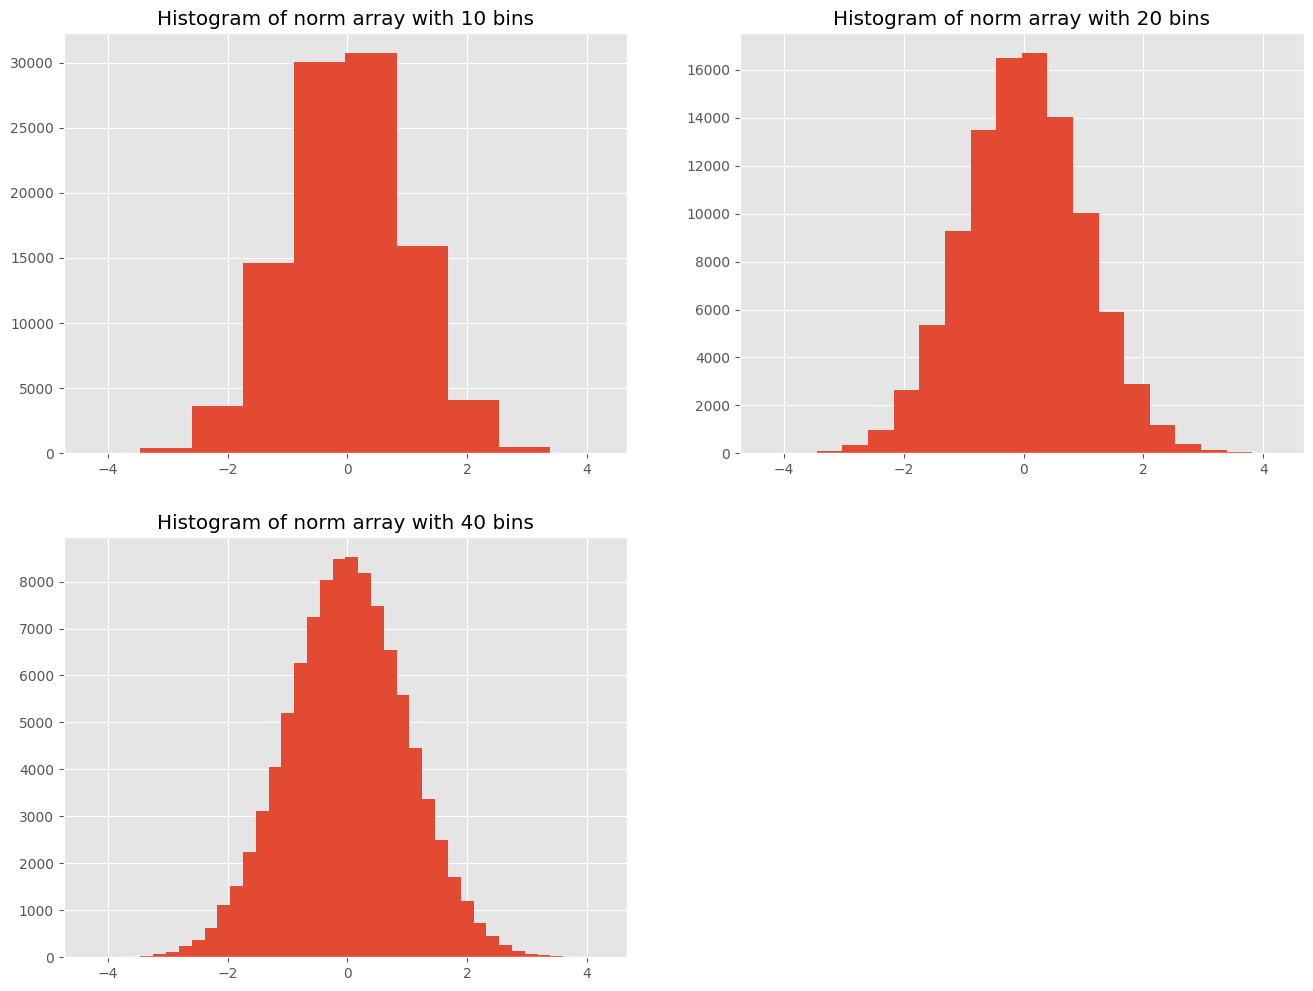

In [176]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(16, 12))
# create a subplot in a 2 by 2 grid, return the subplot at position 1
# these subplots are often called "axes"
sub_fig_1 = fig.add_subplot( 2,2,1 ) # 1-based counting
sub_fig_1.set_title("Histogram of norm array with 10 bins")
sub_fig_2 = fig.add_subplot( 2,2,2 )
sub_fig_2.set_title("Histogram of norm array with 20 bins")
sub_fig_3 = fig.add_subplot( 2,2,3 )
sub_fig_3.set_title("Histogram of norm array with 40 bins")
sub_fig_1.hist(normalArray, 10)
sub_fig_2.hist(normalArray, 20)
sub_fig_3.hist(normalArray, 40)
plt.show()

# Part 2

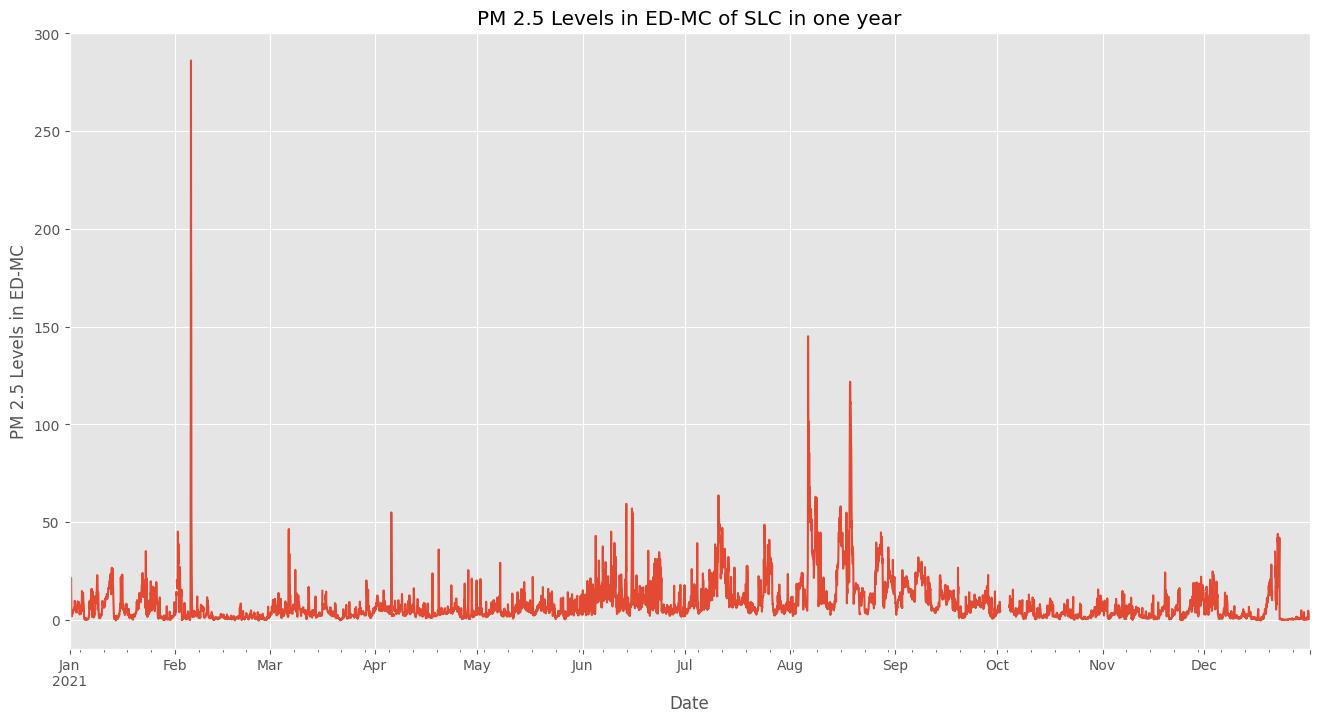

In [177]:
# Plot the readings from that station over the course of a year
dataFrame = pd.read_csv("2021-PM2.5.csv")
dataFrame = dataFrame[['Date', 'ED-MC']]
dataFrame['Date'] = pd.to_datetime(dataFrame['Date'])
dataFrame.set_index('Date', inplace=True)

plt.figure(figsize=(16, 8))  
dataFrame['ED-MC'].plot()
plt.xlabel('Date')
plt.ylabel('PM 2.5 Levels in ED-MC')
plt.title('PM 2.5 Levels in ED-MC of SLC in one year')

plt.show()

          ED-MC
Date           
1      6.933962
2      4.330551
3      4.519515
4      4.746732
5      5.061186
6     10.542083
7     12.696226
8     22.132070
9     10.610987
10     3.722467
11     4.914345
12     4.577379


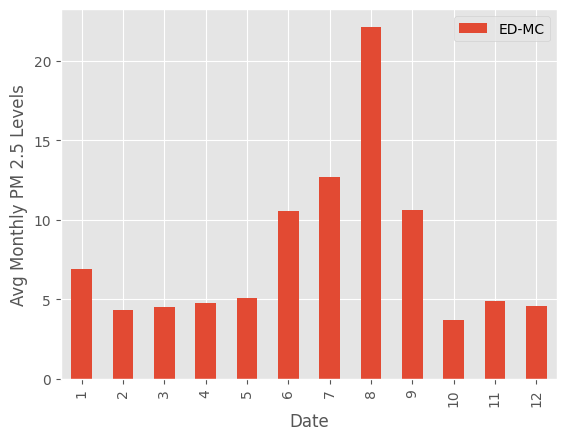

In [178]:
# Plot the mean pm2.5 level for each month using a bar chart. Note any insights you can gain from this visualization
monthAvgs = dataFrame.groupby(dataFrame.index.month).mean()
print(monthAvgs)
monthAvgs.plot(kind="bar")
plt.ylabel('Avg Monthly PM 2.5 Levels')
plt.show()

from the above i can gain the following insights:
- highest PM levels are seen in hotter months such as august, while lowest levels are seen in colder months of february, oct, etc. This suggests to me that PM levels are seasonal and may have to do with more people being outside and traveling more due to better weather and time off work/school. I am suprised by lower levels in october, which is usually when wildfire season starts.


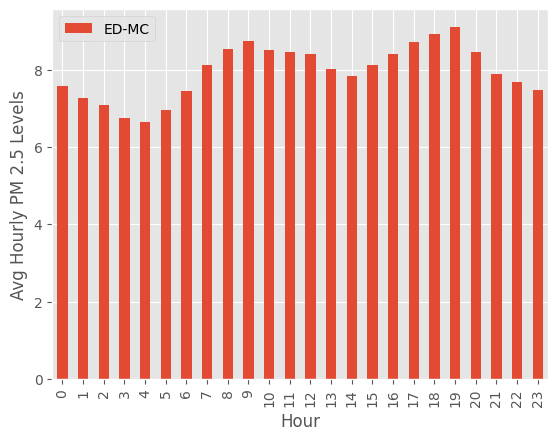

In [179]:
# group the data by time of day (by hour), and plot the mean pollution level for each hour
hourAvgs = dataFrame.groupby(dataFrame.index.hour).mean()
hourAvgs.plot(kind="bar")
plt.ylabel('Avg Hourly PM 2.5 Levels')
plt.xlabel('Hour')
plt.show()

from the above i can gain the following insights:
- highest PM levels are seen increasing around 7-9am and again at 5pm. This could be due to people going to and leaving work

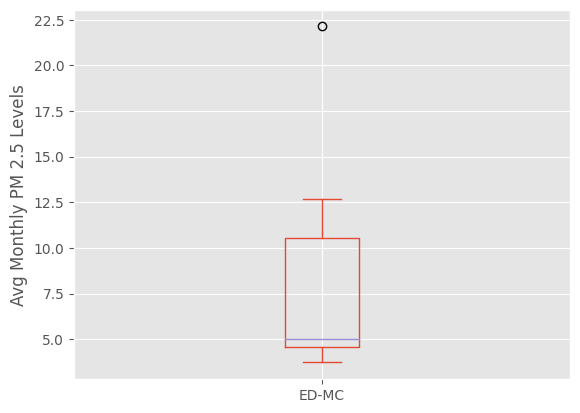

In [180]:
monthAvgs = dataFrame.groupby(dataFrame.index.month).mean()
monthAvgs.plot(kind="box")
plt.ylabel('Avg Monthly PM 2.5 Levels')
plt.show()

- the monthly whisker and box plot gives us additional insights over the bar graph with the fact that it shows us outliers.

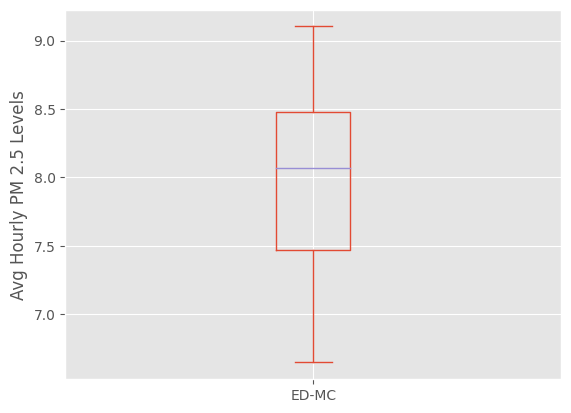

In [181]:
# group the data by time of day (by hour), and plot the mean pollution level for each hour with BOX plot
hourAvgs.plot(kind="box")
plt.ylabel('Avg Hourly PM 2.5 Levels')
plt.xlabel('')
plt.show()

- the hourly whisker and box plot gives us additional insights over the bar graph with the fact that it shows us there are no glaring outliers and data is more evenly dispursed